In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [88]:
## This method is for determening outliers
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    upper_ouliers = Q3 + 1.5 * IQR
    lower_outliers = Q1 - 1.5 * IQR
    outliers = series[(series < lower_outliers) | (series > upper_ouliers)]
    return len(outliers)

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]  

## Content of the tables
### Chemicals table - all of the concentration of the specific chemical, code for the sensor, amount of water(all the data is from 2023)
### Merged_oxygen table - the code of the sensor(it is either 01/07, but it is the same sensor), amount of oxygen, start time, end time(data from 2021)


In [102]:
ammonium = pd.read_parquet('data/Chemical measurements influent 2023_2024/ammonium_2024.parquet')
ammonium = ammonium.rename(columns={"hstWaarde": "hstWaarde_ammonium_2023", "historianTagnummer": "historianTagnummer_ammonium", "datumBeginMeting": "datumBeginMeting_ammonium", "datumEindeMeting": "datumEindeMeting_ammonium"}).reset_index(drop=True)
ammonium['hstWaarde_ammonium_2023'] = ammonium['hstWaarde_ammonium_2023'].apply(pd.to_numeric, errors='coerce')

Number of outliers:  0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc726daeb10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6fce324b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc6ff3d5f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6fce31220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc6fcf47200>],
 'means': []}

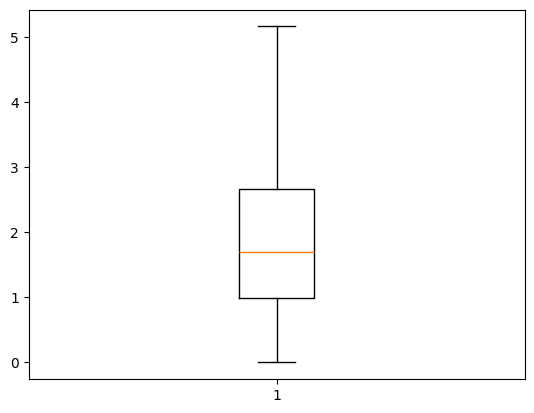

In [100]:
outliers_count = count_outliers_iqr(ammonium['hstWaarde_ammonium_2023'])
print(f"Number of outliers:  {outliers_count}")
plt.boxplot(ammonium['hstWaarde_ammonium_2023'])

<Axes: >

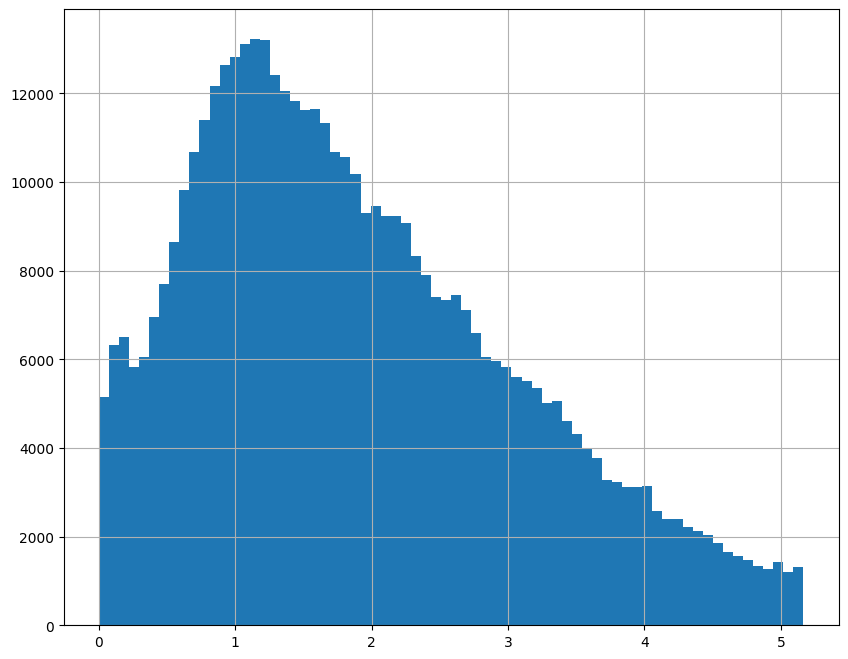

In [101]:
ammonium = remove_outliers_iqr(ammonium, 'hstWaarde_ammonium_2023')
ammonium['hstWaarde_ammonium_2023'].hist(bins=70, figsize=(10, 8))

In [92]:
nitrate = pd.read_parquet('data/Chemical measurements influent 2023_2024/nitrate_2024.parquet')
nitrate = nitrate.rename(columns={"hstWaarde": "hstWaarde_nitrate", "historianTagnummer": "historianTagnummer_nitrate"}).reset_index(drop=True)
nitrate['hstWaarde_nitrate'] = nitrate['hstWaarde_nitrate'].apply(pd.to_numeric, errors='coerce')

Number of outliers:  0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc6fd09cd10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6fd09ff50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc6fd09fd10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6fd09de50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc6fd09e3f0>],
 'means': []}

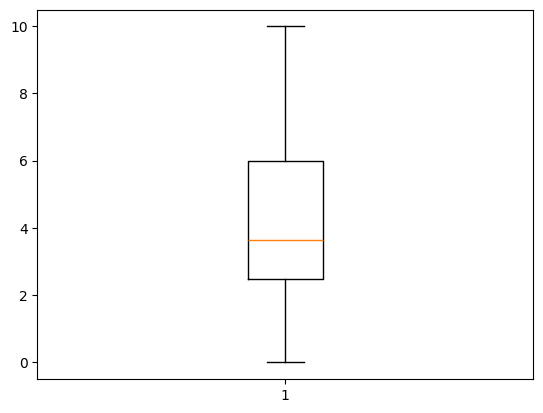

In [83]:
outliers_count = count_outliers_iqr(nitrate['hstWaarde_nitrate'])
print(f"Number of outliers:  {outliers_count}")
plt.boxplot(nitrate['hstWaarde_nitrate'])

<Axes: >

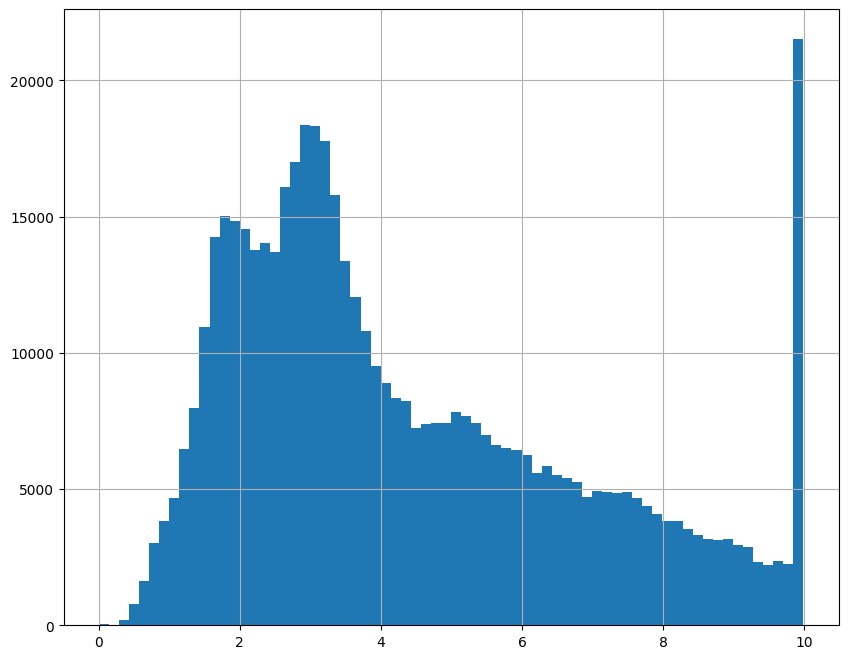

In [103]:
nitrate = remove_outliers_iqr(nitrate, 'hstWaarde_nitrate')
nitrate['hstWaarde_nitrate'].hist(bins=70, figsize=(10, 8))

In [115]:
phosphate = pd.read_parquet('data/Chemical measurements influent 2023_2024/phosphate_2024.parquet')
phosphate = phosphate.rename(columns={"hstWaarde": "hstWaarde_phosphate", "historianTagnummer": "historianTagnummer_phosphate"}).reset_index(drop=True)
phosphate['hstWaarde_phosphate'] = phosphate['hstWaarde_phosphate'].apply(pd.to_numeric, errors='coerce')

Number of outliers:  21886


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc6f8b00320>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6f8b030b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc725eded80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6f8b03680>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc6f8b03950>],
 'means': []}

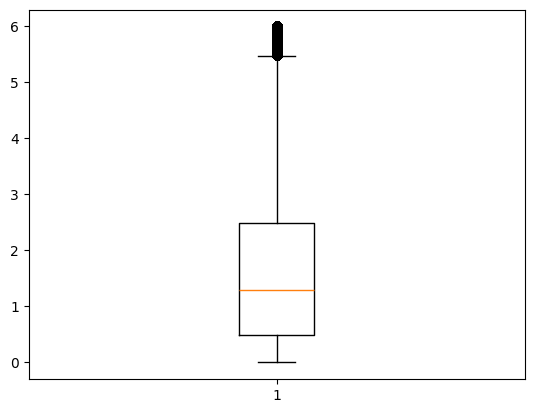

In [116]:
outliers_count = count_outliers_iqr(phosphate['hstWaarde_phosphate'])
print(f"Number of outliers:  {outliers_count}")
plt.boxplot(phosphate['hstWaarde_phosphate'])

<Axes: >

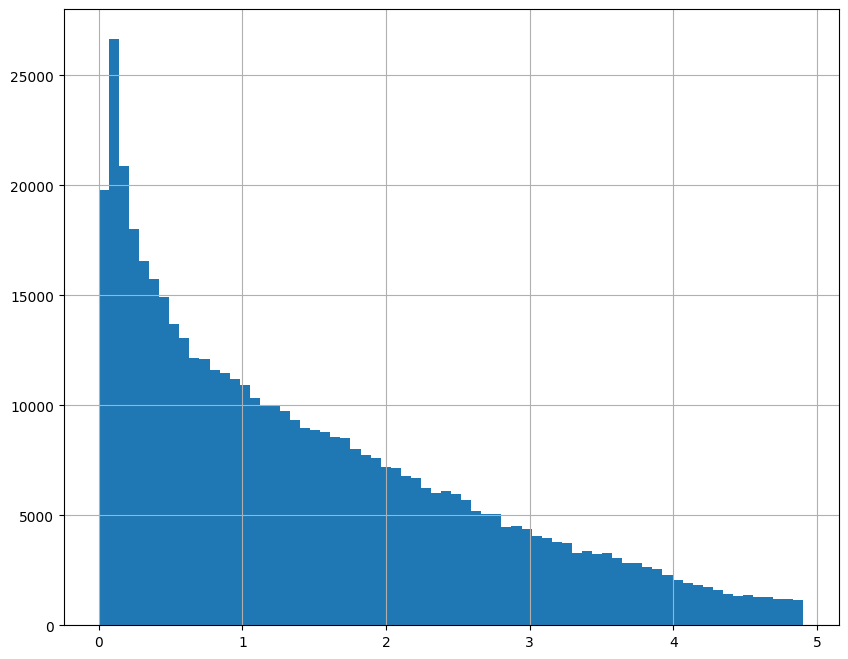

In [113]:
phosphate = remove_outliers_iqr(phosphate, 'hstWaarde_phosphate')
phosphate['hstWaarde_phosphate'].hist(bins=70, figsize=(10, 8))

In [117]:
ammonium_desc = ammonium.describe()
nitrate_desc = nitrate.describe()
phosphate_desc = phosphate.describe()

ammonium_desc.columns = [f'Ammonium_{col}' for col in ammonium_desc.columns]
nitrate_desc.columns = [f'Nitrate_{col}' for col in nitrate_desc.columns]
phosphate_desc.columns = [f'Phosphate_{col}' for col in phosphate_desc.columns]

summary_df = pd.concat([ammonium_desc, nitrate_desc, phosphate_desc], axis=1)
summary_df

Ammonium_hstWaarde_ammonium_2023  Nitrate_hstWaarde_nitrate  \
count                     525049.000000              525049.000000   
mean                           2.749274                   4.384240   
std                            2.913838                   2.461896   
min                            0.000000                   0.000000   
25%                            1.080000                   2.482000   
50%                            1.902000                   3.635000   
75%                            3.194000                   6.004000   
max                           19.985000                   9.990000   

       Phosphate_hstWaarde_phosphate  
count                  525049.000000  
mean                        1.701335  
std                         1.515728  
min                         0.000000  
25%                         0.484000  
50%                         1.286000  
75%                         2.481000  
max                         5.994000

In [118]:
water_flow = pd.read_parquet('data/Influent_Flow_2023.parquet')
water_flow = water_flow.rename(columns={"hstWaarde": "hstWaarde_water"}).reset_index(drop=True)
water_flow['hstWaarde_water'] = water_flow['hstWaarde_water'].apply(pd.to_numeric, errors='coerce')

In [119]:
chemicals = pd.concat([ammonium, nitrate, phosphate, water_flow['hstWaarde_water']], axis=1)
chemicals = chemicals.drop(columns=['waardebewerkingsmethodeCode', 'datumBeginMeting', 'datumEindeMeting'])
chemicals.dropna()

historianTagnummer_ammonium  hstWaarde_ammonium_2023  \
0          EDE_B121069913_K600.MTW                    1.310   
1          EDE_B121069913_K600.MTW                    1.251   
2          EDE_B121069913_K600.MTW                    1.182   
3          EDE_B121069913_K600.MTW                    1.181   
4          EDE_B121069913_K600.MTW                    1.179   
...                            ...                      ...   
525044     EDE_B121069913_K600.MTW                    1.688   
525045     EDE_B121069913_K600.MTW                    1.665   
525046     EDE_B121069913_K600.MTW                    1.642   
525047     EDE_B121069913_K600.MTW                    1.619   
525048     EDE_B121069913_K600.MTW                    1.496   

       datumBeginMeting_ammonium datumEindeMeting_ammonium  \
0            2023-01-01 00:00:00       2023-01-01 00:01:00   
1            2023-01-01 00:01:00       2023-01-01 00:02:00   
2            2023-01-01 00:02:00       2023-01-01 00:03:00   
3            2023-01-01 00:03:00       2023-01-01 00:04:00   
4            2023-01-01 00:04:00       2023-01-01 00:05:00   
...                          ...                       ...   
525044       2023-12-31 23:55:00       2023-12-31 23:56:00   
525045       2023-12-31 23:56:00       2023-12-31 23:57:00   
525046       2023-12-31 23:57:00       2023-12-31 23:58:00   
525047       2023-12-31 23:58:00       2023-12-31 23:59:00   
525048       2023-12-31 23:59:00       2024-01-01 00:00:00   

       historianTagnummer_nitrate  hstWaarde_nitrate  \
0         EDE_B121069914_K600.MTW              4.730   
1         EDE_B121069914_K600.MTW              4.730   
2         EDE_B121069914_K600.MTW              4.730   
3         EDE_B121069914_K600.MTW              4.675   
4         EDE_B121069914_K600.MTW              4.605   
...                           ...                ...   
525044    EDE_B121069914_K600.MTW              8.916   
525045    EDE_B121069914_K600.MTW              9.059   
525046    EDE_B121069914_K600.MTW              9.073   
525047    EDE_B121069914_K600.MTW              9.088   
525048    EDE_B121069914_K600.MTW              9.102   

       historianTagnummer_phosphate  hstWaarde_phosphate  hstWaarde_water  
0           EDE_B121069917_K600.MTW                0.001         3330.199  
1           EDE_B121069917_K600.MTW                0.001         3288.798  
2           EDE_B121069917_K600.MTW                0.000         3260.545  
3           EDE_B121069917_K600.MTW                0.000         3253.279  
4           EDE_B121069917_K600.MTW                0.000         3263.276  
...                             ...                  ...              ...  
525044      EDE_B121069917_K600.MTW                0.160         2977.093  
525045      EDE_B121069917_K600.MTW                0.139         2813.077  
525046      EDE_B121069917_K600.MTW                0.097         2759.432  
525047      EDE_B121069917_K600.MTW                0.096         2702.386  
525048      EDE_B121069917_K600.MTW                0.095         2937.144  

[525049 rows x 9 columns]

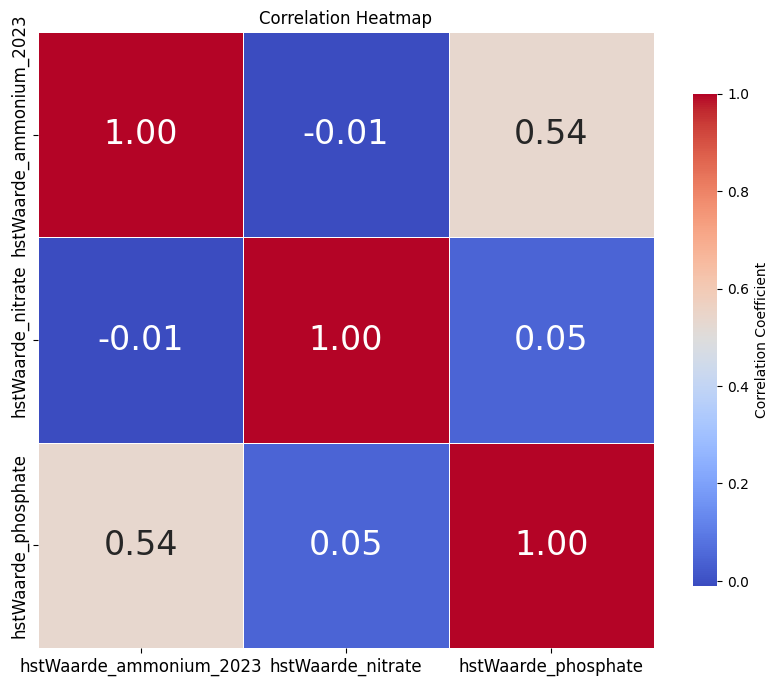

In [120]:
chemicalsForCorr = chemicals[['hstWaarde_ammonium_2023', 'hstWaarde_nitrate', 'hstWaarde_phosphate']]
corr = chemicalsForCorr.corr()
plt.figure(figsize=(10, 8))
plt.title("Correlation Heatmap")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.heatmap(
    corr,
    annot=True,
    annot_kws={"size": 24},       # Font size for numbers
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}  # Optional
)
plt.show()

In [126]:
oxygen_a = pd.read_parquet('data/OxygenData2024/oxygen_a_2024.parquet')
oxygen_a = oxygen_a.drop(columns=['waardebewerkingsmethodeCode'])
legacy_oxygen_a = pd.read_parquet('data/HistoricalWWTPData/DTWINTERNALWWTPDATA/Oxygen Data/zuurstofA_EDE_B121069901_K600.MTW.parquet')

oxygen_b = pd.read_parquet('data/OxygenData2024/oxygen_b_2024.parquet')
oxygen_b = oxygen_b.drop(columns=['waardebewerkingsmethodeCode'])
legacy_oxygen_b = pd.read_parquet('data/HistoricalWWTPData/DTWINTERNALWWTPDATA/Oxygen Data/zuurstofB_EDE_B121069907_K600.MTW.parquet')

##Todo
## merge the tables, but there are two problems:
## 1. the tagnummer are different even though they are for the same thing
## 2. if we want to merge them there is size difference, which makes us run into an error(around 61 days of data is missing)

historianTagnummer hstWaarde     datumBeginMeting  \
0      EDE_B121069901_K600.MTW     0.003  2021-01-01 00:00:00   
1      EDE_B121069901_K600.MTW     0.003  2021-01-01 00:01:00   
2      EDE_B121069901_K600.MTW     0.003  2021-01-01 00:02:00   
3      EDE_B121069901_K600.MTW     0.003  2021-01-01 00:03:00   
4      EDE_B121069901_K600.MTW     0.003  2021-01-01 00:04:00   
...                        ...       ...                  ...   
43195  EDE_B121069901_K600.MTW         0  2021-11-30 23:55:00   
43196  EDE_B121069901_K600.MTW         0  2021-11-30 23:56:00   
43197  EDE_B121069901_K600.MTW         0  2021-11-30 23:57:00   
43198  EDE_B121069901_K600.MTW         0  2021-11-30 23:58:00   
43199  EDE_B121069901_K600.MTW         0  2021-11-30 23:59:00   

          datumEindeMeting  
0      2021-01-01 00:01:00  
1      2021-01-01 00:02:00  
2      2021-01-01 00:03:00  
3      2021-01-01 00:04:00  
4      2021-01-01 00:05:00  
...                    ...  
43195  2021-11-30 23:56:00  
43196  2021-11-30 23:57:00  
43197  2021-11-30 23:58:00  
43198  2021-11-30 23:59:00  
43199  2021-12-01 00:00:00  

[436189 rows x 4 columns]

Text(0.5, 1.0, 'Distribution of ammonium in 2021')

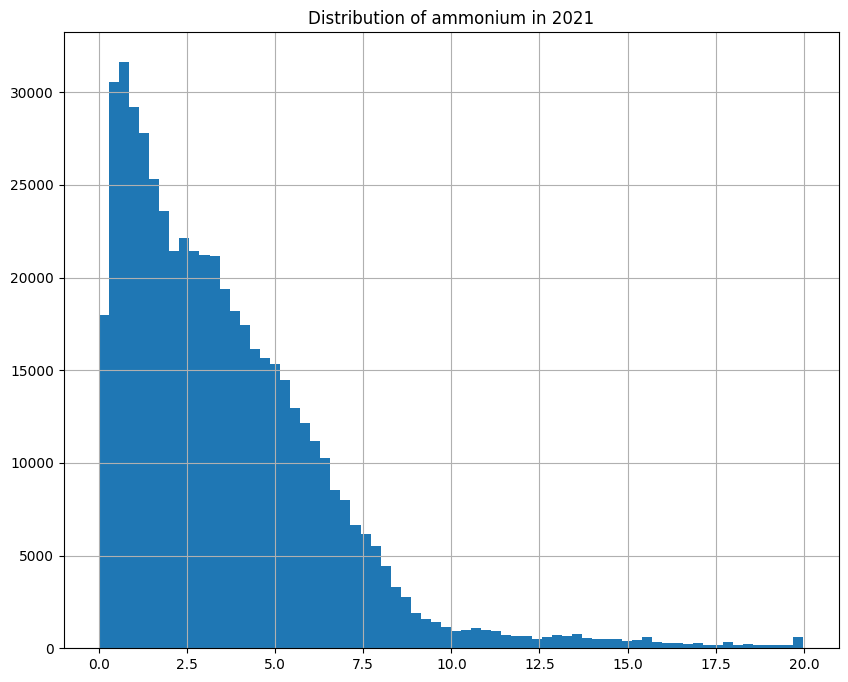

In [122]:
sensor_13 = pd.read_parquet('data/HistoricalWWTPData/DTWINTERNALWWTPDATA/Data/EDE_B121069913_K600.MTW.parquet')
sensor_13['hstWaarde'] = sensor_13['hstWaarde'].apply(pd.to_numeric, errors='coerce')
sensor_13 = sensor_13.rename(columns={"hstWaarde": "hstWaarde_ammonium_2021"}).reset_index(drop=True)
sensor_13.hist(bins=70, figsize=(10, 8))
plt.title(f'Distribution of ammonium in 2021')

Text(0.5, 1.0, 'Distribution of ammonium in 2023')

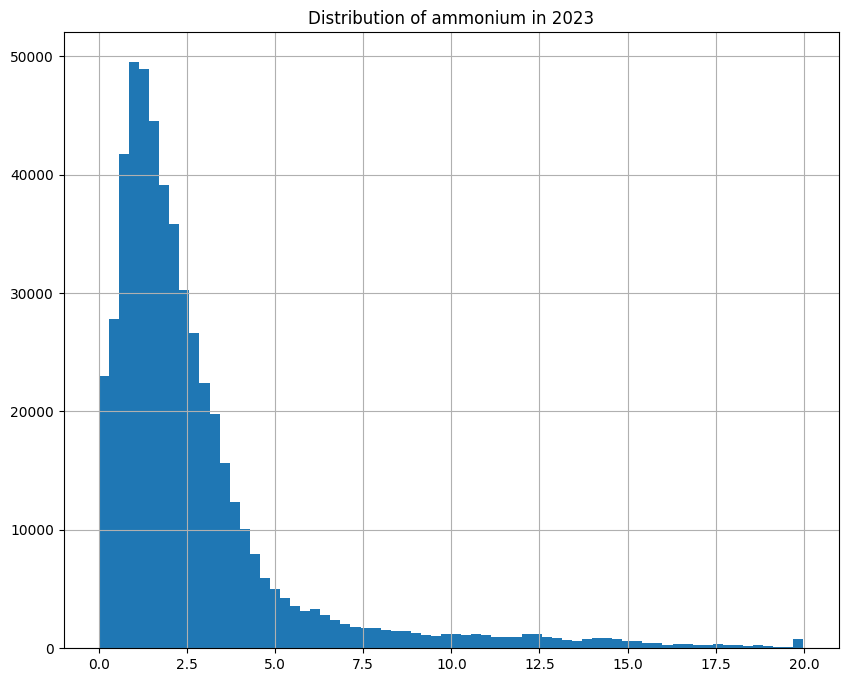

In [123]:
ammonium.hist(bins=70, figsize=(10, 8))
plt.title(f'Distribution of ammonium in 2023')

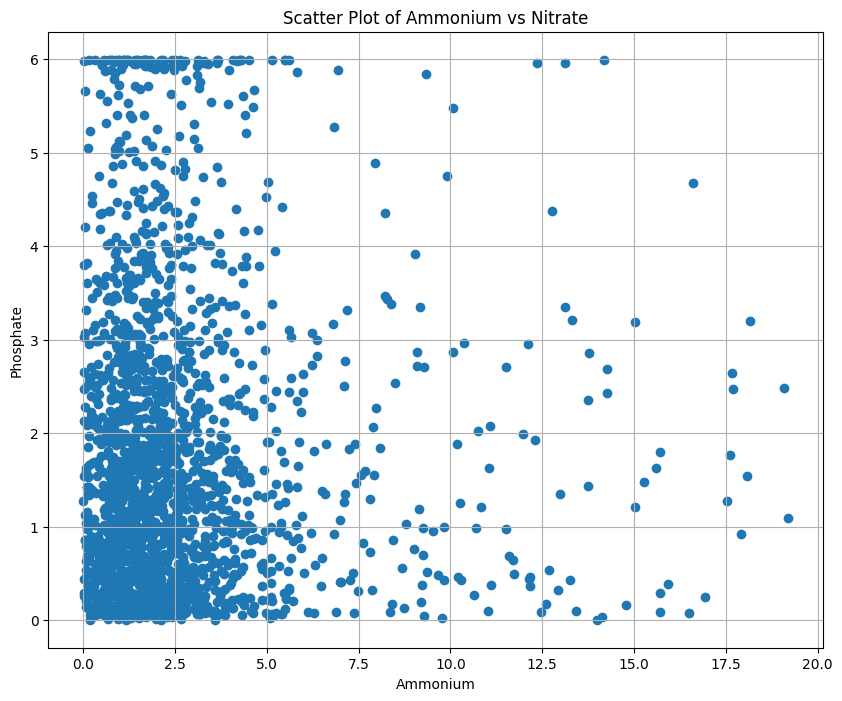

In [124]:
plt.figure(figsize=(10, 8))
plt.scatter(chemicals['hstWaarde_ammonium_2023'].sample(2000), chemicals['hstWaarde_phosphate'].sample(2000))
plt.xlabel('Ammonium')
plt.ylabel('Phosphate')
plt.title('Scatter Plot of Ammonium vs Nitrate')
plt.grid(True)